In [11]:
from radiomics import featureextractor
from cv2 import imread
import SimpleITK as sitk
import numpy as np
from PIL import Image, ImageCms

In [12]:
path = r'C:\Users\R\PycharmProjects\Thesis_cur-AI-tor\images\ff742b8e8e6120f27ec567f60143fc82.jpg'
# path = r'C:\Users\Rodney\PycharmProjects\Thesis_cur-AI-tor\images\ff742b8e8e6120f27ec567f60143fc82.jpg'

image = imread(path)
print(f'image shape: {image.shape}; \nimage size: {image.size}')

image shape: (371, 400, 3); 
image size: 445200


In [13]:
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

In [14]:
img = Image.open(path)
# img = img.convert('L')

# Extract RGB channels
red_channel = np.array(img.getchannel(0))
green_channel = np.array(img.getchannel(1))
blue_channel = np.array(img.getchannel(2))

#Extract Lab channels
srgb_p = ImageCms.createProfile("sRGB")
lab_p  = ImageCms.createProfile("LAB")
rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
lab = ImageCms.applyTransform(img, rgb2lab)
l_channel, a_channel, b_channel = lab.split()


ImportError: cannot import name '_imagingcms' from 'PIL' (C:\Users\R\anaconda3\envs\Thesis_cur-AI-tor\lib\site-packages\PIL\__init__.py)

In [ ]:
grayscale = np.array(img)
im = sitk.GetImageFromArray(grayscale)
ma = sitk.GetImageFromArray(np.ones(grayscale.shape, dtype='uint8'))
ma.CopyInformation(im)

In [5]:
features = extractor.execute(im, ma, label=1)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [7]:
stats_keys = [x for x in list(features.keys()) if x[0][0] == 'o']

In [8]:
stats_dict = {k[9:]: float(features[k]) for k in stats_keys}

In [9]:
stats_dict

{'firstorder_10Percentile': 46.0,
 'firstorder_90Percentile': 184.0,
 'firstorder_Energy': 2296362615.0,
 'firstorder_Entropy': 3.051072904638223,
 'firstorder_InterquartileRange': 87.0,
 'firstorder_Kurtosis': 2.095084047450319,
 'firstorder_Maximum': 249.0,
 'firstorder_MeanAbsoluteDeviation': 44.42428651528251,
 'firstorder_Mean': 112.68588274932614,
 'firstorder_Median': 114.0,
 'firstorder_Minimum': 0.0,
 'firstorder_Range': 249.0,
 'firstorder_RobustMeanAbsoluteDeviation': 34.215055726801246,
 'firstorder_RootMeanSquared': 124.3951028397506,
 'firstorder_Skewness': -0.00809546849360065,
 'firstorder_TotalEnergy': 2296362615.0,
 'firstorder_Uniformity': 0.12937744222288416,
 'firstorder_Variance': 2776.033439517249,
 'glcm_Autocorrelation': 29.18871561014432,
 'glcm_ClusterProminence': 560.0536554699604,
 'glcm_ClusterShade': 2.29552077500326,
 'glcm_ClusterTendency': 16.49544108084075,
 'glcm_Contrast': 1.3356237384685214,
 'glcm_Correlation': 0.8501980822484076,
 'glcm_Differenc

In [16]:
list(stats_dict.keys()
)

['firstorder_10Percentile',
 'firstorder_90Percentile',
 'firstorder_Energy',
 'firstorder_Entropy',
 'firstorder_InterquartileRange',
 'firstorder_Kurtosis',
 'firstorder_Maximum',
 'firstorder_MeanAbsoluteDeviation',
 'firstorder_Mean',
 'firstorder_Median',
 'firstorder_Minimum',
 'firstorder_Range',
 'firstorder_RobustMeanAbsoluteDeviation',
 'firstorder_RootMeanSquared',
 'firstorder_Skewness',
 'firstorder_TotalEnergy',
 'firstorder_Uniformity',
 'firstorder_Variance',
 'glcm_Autocorrelation',
 'glcm_ClusterProminence',
 'glcm_ClusterShade',
 'glcm_ClusterTendency',
 'glcm_Contrast',
 'glcm_Correlation',
 'glcm_DifferenceAverage',
 'glcm_DifferenceEntropy',
 'glcm_DifferenceVariance',
 'glcm_Id',
 'glcm_Idm',
 'glcm_Idmn',
 'glcm_Idn',
 'glcm_Imc1',
 'glcm_Imc2',
 'glcm_InverseVariance',
 'glcm_JointAverage',
 'glcm_JointEnergy',
 'glcm_JointEntropy',
 'glcm_MCC',
 'glcm_MaximumProbability',
 'glcm_SumAverage',
 'glcm_SumEntropy',
 'glcm_SumSquares',
 'gldm_DependenceEntropy',
 '

In [17]:
img = imread(path)

In [18]:
type(img)

numpy.ndarray

In [29]:
import numpy as np
from radiomics import featureextractor
from cv2 import imread, split
import SimpleITK as sitk
from PIL import Image, ImageCms, ImageOps
import traceback

extractor = featureextractor.RadiomicsFeatureExtractor()
path = r'C:\Users\R\PycharmProjects\Thesis_cur-AI-tor\images\ff742b8e8e6120f27ec567f60143fc82.jpg'
img = imread(path)

def load_image(input_path: str):
    try:
        img = Image.open(input_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
    except (OSError, IOError):
        print(f'Opening image failed: \n {traceback.format_exc()}')
    return np.array(img)

def tile_image(img, n_blocks=(3, 3)):
    horizontal = np.array_split(img, n_blocks[0])
    split_img = [np.array_split(block, n_blocks[1], axis=1) for block in horizontal]
    return np.asarray(split_img, dtype=np.ndarray).reshape(n_blocks)

def split_image_rgb(image):
    # Channel order: R, G, B
    return np.dsplit(image,image.shape[-1])

def split_image_lab(image):
    # Channel order: L, a, b
    image = Image.fromarray(image)
    srgb_p = ImageCms.createProfile("sRGB")
    lab_p  = ImageCms.createProfile("LAB")
    rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
    image = ImageCms.applyTransform(image, rgb2lab)
    return [np.array(x) for x in image.split()]


def full_image_metrics(image: np.array):
    # Load image and dummy mask
    im = sitk.GetImageFromArray(image)
    ma = sitk.GetImageFromArray(np.ones(image.shape, dtype='uint8'))
    ma.CopyInformation(im)

    # Extract features into clean dict
    features = extractor.execute(im, ma, label=1)
    stats_keys = [x for x in list(features.keys()) if x[0][0] == 'o']
    stats_dict = {k[9:]: float(features[k]) for k in stats_keys}
    return stats_dict

<class 'numpy.ndarray'>


In [30]:
image_array = load_image(path)
print(f'type = {type(image_array)}, shape = {image_array.shape}')

type = <class 'numpy.ndarray'>, shape = (371, 400, 3)


In [31]:
tiled_image = tile_image(image_array)
print(f'type = {type(tiled_image)}, shape = {tiled_image.shape}')

type = <class 'numpy.ndarray'>, shape = (3, 3)


3

In [32]:
tiles = []
for i in range(len(tiled_image)):
    for j in tiled_image[i]:
        tiles.append(j)

tiled_split_red = split_image_rgb(tiles[0])
tiled_split_l = split_image_lab(tiles[0])

In [34]:
full_image_metrics(tiled_split_l[1])


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


{'firstorder_10Percentile': 102.0,
 'firstorder_90Percentile': 171.0,
 'firstorder_Energy': 343266632.0,
 'firstorder_Entropy': 1.8169413790747522,
 'firstorder_InterquartileRange': 41.0,
 'firstorder_Kurtosis': 2.243281027077956,
 'firstorder_Maximum': 176.0,
 'firstorder_MeanAbsoluteDeviation': 21.1641785249595,
 'firstorder_Mean': 141.52575830524796,
 'firstorder_Median': 143.0,
 'firstorder_Minimum': 83.0,
 'firstorder_Range': 93.0,
 'firstorder_RobustMeanAbsoluteDeviation': 16.457016496075397,
 'firstorder_RootMeanSquared': 143.73169683145437,
 'firstorder_Skewness': -0.49518506772690063,
 'firstorder_TotalEnergy': 343266632.0,
 'firstorder_Uniformity': 0.3197239323479826,
 'firstorder_Variance': 629.2604101736491,
 'glcm_Autocorrelation': 10.560891788094306,
 'glcm_ClusterProminence': 36.19010266973587,
 'glcm_ClusterShade': -5.682575185742244,
 'glcm_ClusterTendency': 3.7083845400592685,
 'glcm_Contrast': 0.10540156876096438,
 'glcm_Correlation': 0.9447374281256673,
 'glcm_Diffe

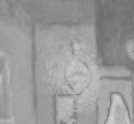

In [23]:
tiled_split_l[2]

In [27]:
len(tiled_split_red)

3

In [28]:
type(tiled_split_red[0])

numpy.ndarray

In [1]:

import metrics_pyradiomics
import metrics
import pickle
import glob


# with open('../files.pkl', 'rb') as f:
#     files = pickle.load(f)
files = glob.glob('C:/Users/R/PycharmProjects/Thesis_cur-AI-tor/images/*.*')

In [2]:
metrics_function_list_tiles = [metrics.contrast_rms, metrics.contrast_tenengrad, metrics.fractal_dimension, metrics.sharpness, metrics.sharpness_laplacian, metrics.color_dominant, metrics.colorfulness, metrics.hue_mean, metrics.pixel_intensity_mean,metrics.saturation_mean, metrics.entropy_shannon, metrics.k_complexity_bw, metrics.k_complexity_lab_l, metrics.k_complexity_lab_a, metrics.k_complexity_lab_b]

metrics_function_list_tiles_channels = [metrics.contrast_rms, metrics.contrast_tenengrad, metrics.fractal_dimension, metrics.sharpness, metrics.sharpness_laplacian, metrics.pixel_intensity_mean, metrics.entropy_shannon]

In [15]:
stats_list = []

for path in files:
    stats_dict = None
    image = metrics_pyradiomics.load_image(path)
    tiled_image = metrics_pyradiomics.tile_image(image)

    tiles = []
    for i in range(len(tiled_image)):
        for j in tiled_image[i]:
            tiles.append(j)

    # Pyradiomic stats
    stats = {'path': path}
    for idx, tile in enumerate(tiles):
        r, g, b = metrics_pyradiomics.split_image_rgb(tile)

        r_measurement = metrics_pyradiomics.full_image_metrics(r)
        g_measurement = metrics_pyradiomics.full_image_metrics(g)
        b_measurement = metrics_pyradiomics.full_image_metrics(b)
        stats.update({f'tile{idx+1}_red': r_measurement})
        stats.update({f'tile{idx+1}_green': g_measurement})
        stats.update({f'tile{idx+1}_blue': b_measurement})

        l, a, b = metrics_pyradiomics.split_image_lab(tile)
        l_measurement = metrics_pyradiomics.full_image_metrics(l)
        a_measurement = metrics_pyradiomics.full_image_metrics(a)
        b_measurement = metrics_pyradiomics.full_image_metrics(b)
        stats.update({f'tile{idx+1}_l': l_measurement})
        stats.update({f'tile{idx+1}_a': a_measurement})
        stats.update({f'tile{idx+1}_b': b_measurement})

    stats_dict = {'path': path}

    for k in list(stats.keys())[1:]:
        for stat in stats[k]:
            stats_dict[k + '_' + stat] = stats[k][stat]

    # Oude stats
    for idx, tile in enumerate(tiles):
        for metric_function in metrics_function_list_tiles:
            output = None
            try:
                output = metric_function(tile)
            except Exception:
                output = -999
            finally:
                if not output:
                    output = -999
                stats_dict.update({f'tile{idx+1}_' + metric_function.__name__: output})

        r, g, b = metrics_pyradiomics.split_image_rgb(tile)
        l, a, b_ = metrics_pyradiomics.split_image_lab(tile)

        for metric_function in metrics_function_list_tiles_channels:
            output_red = None
            output_green = None
            output_blue = None
            output_l = None
            output_a = None
            output_b_ = None
            try:
                output_red = metric_function(r.squeeze())
                output_green = metric_function(g.squeeze())
                output_blue = metric_function(b.squeeze())

                output_l = metric_function(l)
                output_a = metric_function(a)
                output_b = metric_function(b_)
            except Exception:
                output_red = -999
                output_green = -999
                output_blue = -999
                output_l = -999
                output_a = -999
                output_b = -999

            stats_dict.update({f'tile{idx+1}_red_' + metric_function.__name__: output_red})
            stats_dict.update({f'tile{idx+1}_green_' + metric_function.__name__: output_green})
            stats_dict.update({f'tile{idx+1}_blue_' + metric_function.__name__: output_blue})
            stats_dict.update({f'tile{idx+1}_l_' + metric_function.__name__: output_l})
            stats_dict.update({f'tile{idx+1}_a_' + metric_function.__name__: output_a})
            stats_dict.update({f'tile{idx+1}_b_' + metric_function.__name__: output_b})

    stats_list.append(stats_dict)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to b

In [16]:
import pandas as pd
df = pd.DataFrame(stats_list)

In [17]:
# df.columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 5914 entries, path to tile9_b_entropy_shannon
dtypes: float64(5904), object(10)
memory usage: 92.5+ KB


In [19]:

df.head()

,path,tile1_red_shape_Elongation,tile1_red_shape_Flatness,tile1_red_shape_LeastAxisLength,tile1_red_shape_MajorAxisLength,tile1_red_shape_Maximum2DDiameterColumn,tile1_red_shape_Maximum2DDiameterRow,tile1_red_shape_Maximum2DDiameterSlice,tile1_red_shape_Maximum3DDiameter,tile1_red_shape_MeshVolume,...,tile9_blue_pixel_intensity_mean,tile9_l_pixel_intensity_mean,tile9_a_pixel_intensity_mean,tile9_b_pixel_intensity_mean,tile9_red_entropy_shannon,tile9_green_entropy_shannon,tile9_blue_entropy_shannon,tile9_l_entropy_shannon,tile9_a_entropy_shannon,tile9_b_entropy_shannon
0,C:/Users/R/PycharmProjects/Thesis_cur-AI-tor/i...,0.925369,0.0,0.0,154.725563,124.0,181.892826,134.0,181.892826,16487.166667,...,78.318846,133.927441,155.556024,156.300446,7.187950,7.304421,7.259593,7.015469,6.081752,5.683937
1,C:/Users/R/PycharmProjects/Thesis_cur-AI-tor/i...,0.925369,0.0,0.0,154.725563,124.0,181.892826,134.0,181.892826,16487.166667,...,49.071398,168.480592,131.002445,184.522831,7.030413,7.044312,6.644477,6.939141,4.344989,4.900725


In [20]:
df.to_excel('xx.xlsx')